<h2>Algoritmo de Dijkstra</h2>


Este algortimo nos sirve para encontrar el camino mínimo de UN VÉRTICE a los demás vértices de una gráfica con pesos, cuando todos los pesos de las aristas son no negativos.<br>

Se utiliza la técnica de relajación,el proceso de relajar una arista consiste en probar si podemos mejorar el camino hacia un vértice v pasando por el vértice u y si es que se puede mejorar, actualizarlo. Para poder hacer la relajación, primero hay que incializar la gráfica para tener un valor inicial contra el cual vamos a comparar.

El pseudo algorimto que vamos a usar como referencia para esta función es el siguiente (Cormen, p. 648):
<br>
<img src="./img/dijksta_initialize_single_source.jpeg" alt="Pseudocodigo Initialize Single Source" />

In [55]:
def initialize_single_source(A, s):
    Q = [[]]
    #primer fila de la matriz Q, todos "infinito(1M)" menos el nodo origen a si mismo
    for i in range(0, len(A[0])):
        if i == s:
            Q[0].append(0)
        else:
            Q[0].append(1000000)
    return Q

<h4>Función Relax</h4>
En esta función vamos a realizar el proceso descrito anterioirmente, el cual es probar si podemos mejorar el camino hacia un vértice v pasando por el vértice u y si es que se puede mejorar, actualizarlo. En otras palabras es verificar si el camino que tenemos actualmente es el más corto posible o si hay otro camino, pasando por otro vértice u que puede ser más corto al que tenemos actualmente.

El pseudo algorimto que vamos a usar como referencia para esta función es el siguiente (Cormen, p. 649):
<br>
<img src="./img/pseudo_relax.jpeg" alt="Pseudocodigo Relaxation" />


In [145]:
def relax(v, Q, S):
    #para cada columna del renglón Q[v] (v es igual a z de la función dijkstra)
    for i in range(0, len(Q[0])):
        #si el valor anterior en la columna es MAYOR que
        #el valor nuevo + el valor del origen a la base anterior (Q.index(u))
        if Q[v][i] >  Q[v+1][i] + Q[v][S[v]]:
            Q[v+1][i] = Q[v+1][i] + Q[v][S[v]]
        #si el valor anterior en la columna es MENOR que
        #el valor nuevo + el valor del origen a la base anterior (Q.index(u))
        else:
            Q[v+1][i] = Q[v][i]

Ya que tenemos las dos funciones anteriores, podemos implementar la función dijkstra la cual utliza en su funcionamiento a initialize_single_source y relax.<br>
<br>
Esta función utliza como parámetros el arreglo A, el cual es la representación de una gráfica como una matriz y s el cual es el nodo origen (source), la función nos va a devolver las distancias mínimas entre el nodo origen y los demás nodos de la gráfica.<br>
El funcionamiento general consiste en... primero inicializar la matriz Q, donde el primer renglón serán infinitos(1M) y el único elemento que será distino será la columna del nodo origen, la cual será 0.<br>
Después vamos a buscar el elemento mínimo en ese renglón, lo declararemos como base, posteriormente vamos a buscar dentro de las adjacencias que tiene ese nodo base en la matriz A y vamos a ingrsear ese renglón a la matriz Q como un nuevo renglón, una vez que actualizamos la matriz Q vamos a ejecutar la función relax sobre la matriz Q para tener el mínimo valor posible en el renglón. Y volvmos a buscar el mínimo en ese renglón en una nueva iteración hasta completar todos los nodos.
<br>

El pseudo algorimto que vamos a usar como referencia para esta función es el siguiente (Cormen, p. 658):
<br>
<img src="./img/pseudo_dijkstra.jpeg?raw=true" alt="Pseudocodigo Dijkstra" />

In [222]:
def dijkstra(A, s):
    Q = initialize_single_source(A, s)
    #creamos la lista vacía S
    S = []
    #z va a ser el contador de las veces que se ejecuta el while
    z = 0
    #declaramos una lista auxiliar L que nos ayudara a ya no contemplar los nodos que están listos
    L = []
    for i in range (0, len(A[0])):
        L.append(i)
    #mientras S no tenga a todos los nodos de la gráfica
    while len(S) != len(A[0]):
        #-----------------------------------inicio línea 1
        #mínimo del renglon Q[z], sin contemplar a los anteriores
        u = 100000000000
        for element in L:
            if Q[z][element] < u:
                u = Q[z][element]
                x = element
            else:
                u = u
        #el mínimo va a ser la base de este reglón
        #BASE: es el nodo a partir del cual vamos a buscar nuevos aminos con sus nodos adjacentes
        base = x
        #quitamos el nodo de base, para ya no tomarlo en cuanta en las futuras búsquedas de mínimos
        L.remove(x)
        #------------------------------------- inicio línea 2
        #metemosel mínimo a la lista S, la cual nos va a indicar el orden en que se tomaron los nodos base
        #y nos servirá como mpetodo de paro en el while
        S.append(base)
        #--------------------------------------inicio línea 3
        #declaramos una lista auxiliar t
        t = []
        #para cada columna del renglón A[v] (v es igual a z de la función dijkstra)
        for i in range(0, len(A[z])):
            #si son adjecentes ponemos el peso en t
            if A[base][i] != 0:
                t.append(A[base][i])
            #si no son adjacentes ponemos "infinito(1M)"
            else:
                t.append(1000000)
        #metemos un nuevo renglon a la matriz Q 
        Q.append(t)
        relax(z, Q, S)
        #aumentamos el renglón en Q
        z = z+1
    print("Q:")
    print(Q)
    print("Orden de las bases:")
    print(S)
    
    valores = []
    for i in range(0,len(S)):
        valores.append(Q[i][S[i]])
    for i in range(len(S)):
        print("La distancia desde el origen a el nodo " + str(S[i]) + " es de " + str(valores[i]))
        
        

<h3>Prueba del algortimo</h3>
Se va a correr el algoritmo para verficiar que funcione correctamente

In [229]:
#A es la matriz que representa a la gráfica y los números son los respectivos pesos de las adjacencias
#0 siginfica que no hay adjacencia
A = [[0,2,0,0,1], [2,0,4,1,0], [0,4,0,1,0], [0,1,1,0,3], [1,0,0,3,0]]
dijkstra(A, 1)

Q:
[[1000000, 0, 1000000, 1000000, 1000000], [2, 0, 4, 1, 1000000], [2, 0, 2, 1, 4], [2, 0, 2, 1, 3], [2, 0, 2, 1, 3], [2, 0, 2, 1, 3]]
Orden de las bases:
[1, 3, 0, 2, 4]
La distancia desde el origen a el nodo 1 es de 0
La distancia desde el origen a el nodo 3 es de 1
La distancia desde el origen a el nodo 0 es de 2
La distancia desde el origen a el nodo 2 es de 2
La distancia desde el origen a el nodo 4 es de 3


<h3>Verificación del algoritmo</h3>
<br>
<b>Inicialización:</b> Cuando la matriz Q se encuentra vacía utilizamos la función initialize_single_source para poder empezar el proceso de encontrar el mínimo y tener los primeros 2 renglones donde ejecutar la relajación, esta función se ejecuta una sola vez en la función dijkstra.
<br><br>
<b>Mantenimiento:</b> Para cada iteración del while se realizan 3 proceso clave:
<br><br>
1- Enocntrar el elemento mínimo del renglón mas reciente en la matriz Q y declararlo como la base.<br>
2- Meter el renglón correspondiente a la base en la matriz A a la matriz Q como un nuevo renglón.<br>
3- Ejecutar la relajación para ese nuevo renglón  de la matriz Q comaprandolo con el anterior. Con este proceso se garantiza llegar a los caminos más cortos ya que para cada iteración del while se realiza la relajación.
<br><br>
<b>Fin:</b> El algortimo se detiene cuando la lista S tiene la misma longitud que el primer renglón de la matriz A, es decir, cuando todos los nodos de la gráfica hayan sido base en el algortimo. en cada iteración del while se agrega el nodo base a la lista por lo que necesariamente llegaremos al criterio del paro.<br>

<h3>Timepo de ejecución</h3>
<b>Función initialize_single_source:</b> &Theta; (n) donde n es el número de nodos que tiene la gráfica<br>
Para poder confirmar que el timepo de ejecución es &Theta; (n), basta con observar que el ciclo for se ejecuta una vez por cada columna de la matriz A. <br>

<b>Función relax:</b> &Theta; (n) donde n es el número de nodos que tiene la gráfica<br>
Para poder confirmar que el timepo de ejecución es &Theta; (n), basta con observar que el ciclo for se ejecuta una vez por cada columna de la matriz Q. <br>

<b>Función Dijkstra:</b> La función initialize_single_source tiene un timepo &Theta; (n)<br>

El primer for tiene un timepo &Theta; (n), ya que se ejecuta 1 vez por cada columna de A.<br>

El ciclo while se ejecuta n veces, ya que en cada ejecución se aumenta un valor a la lista S.<br>

El primer for dentro del ciclo while tiene un timepo máximo de &Theta; (n), ya que se ejecuta 1 vez por cada elemento en L y esa lista va reduciendo con cada ejecución del while.<br>

El segundo for dentro del ciclo while tiene un timepo &Theta; (n), ya que se ejecuta 1 vez por cada columna de A.<br>

La función se relax se ejecuta fuera del ciclo for por lo que es una sola vez por ejecución del while. Esto se debe a la manera en que se implementó, el timepo de ejecución no cambia con respecto al pseudocódigo de refrencia ya que aún existe el for dentro del while.<br>

Después del análisis anterior podemos decir que el timepo de ejecución es &Theta; (n^2), ya que el máximo tiempo de iteración es n dentro del while, enotnces sería n*n = n^2.<br>
Este tiempo de ejecución puede ser mejorado usando listas con prioridades.
<br>

<h3>Experimentación con el tiempo de ejecución</h3>
Vamos a ejecutar 10 veces el algortimo con diferentes tamaños de gráfio (por lo tanto diferente tamaño de matriz) y graficaremos los tiempos de ejecución para se pueda observar como coinciden con el tiempo de ejecución que calculamos:

In [260]:
from timeit import default_timer
import random

#w define el tamaño de la matriz A
w = 700
A = [[]] * w
for i in range(0, w):
    if i == j:
        A[i].append(0)
    else:
        n = random.randint(0,5000)
        A[i].append(n)
inicio = default_timer()
x = dijkstra(A, 0)
fin = default_timer()
print("")
print(str(i+1) + ' elementos: ' + str(fin-inicio))

Q:
[[0, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 10

Text(0, 0.5, 'Segundos')

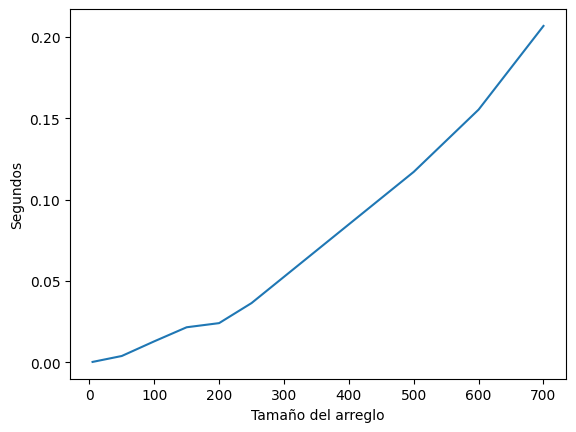

In [261]:
import matplotlib.pyplot as plt

elementos = [5, 50, 100, 150, 200, 250, 500, 600, 700]
tiempos = [0.0003513999981805682, 0.003991800011135638, 0.012983499997062609, 0.02163709999877028, 0.02417710001464002, 0.03649470000527799, 0.11707839998416603, 0.15532780002104118, 0.206725700001698]
import matplotlib.pyplot as plt

plt.plot(elementos, tiempos)
plt.xlabel('Tamaño del arreglo')
plt.ylabel('Segundos')